In [65]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
URL = 'https://en.wikipedia.org/wiki/List_of_largest_technology_companies_by_revenue'
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')


In [39]:
df = pd.read_html(str(soup.find('table', {'class':'wikitable sortable plainrowheads'})))[0]

In [40]:
df.drop(columns = ['Company', 'Fiscal Year Ending'], inplace=True)

In [41]:
df.rename(columns={'Rank[1]': 'Rank', 'Company.1': 'Company'}, inplace=True)

In [42]:
df.set_index('Rank', inplace=True)

In [44]:
df['Revenue ($B) USD'] = df['Revenue ($B) USD'].str.replace('\[\d+]', '')
df['Employees'] = df['Employees'].str.replace('\[\d+]', '')

In [47]:
df['Employees'] = df['Employees'].str.replace(',', '').astype(int)

In [61]:
df['Revenue ($B) USD'] = df['Revenue ($B) USD'].str.replace('$', '').str.replace('–.+', '').astype(float)

In [75]:
df['Country'] = df['Headquarters'].str.split(', ').str[-1]

In [76]:
df

,Company,Revenue ($B) USD,Employees,Headquarters,Country
Rank,,,,,
1,Apple Inc.,229.2,123000,"Cupertino, California, US",US
2,Samsung Electronics,211.9,320670,"Suwon, South Korea",South Korea
3,Amazon,177.9,613300,"Seattle, Washington, US",US
4,Foxconn,154.7,803126,"New Taipei City, Taiwan",Taiwan
5,Alphabet Inc.,110.8,80110,"Mountain View, California, US",US
6,Microsoft,90.0,124000,"Redmond, Washington, US",US
7,Huawei,89.3,180000,"Shenzhen, China",China
8,Hitachi,84.6,307275,"Tokyo, Japan",Japan
9,IBM,79.1,397800,"Armonk, New York, US",US


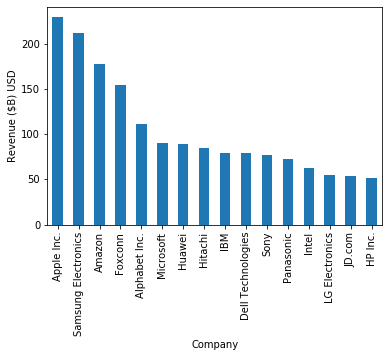

In [67]:
df.set_index('Company')['Revenue ($B) USD'].plot(kind='bar')
plt.ylabel('Revenue ($B) USD');

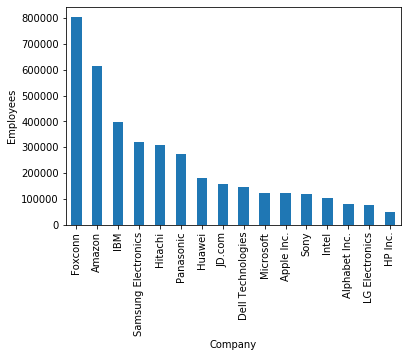

In [71]:
df.set_index('Company')['Employees'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Employees');

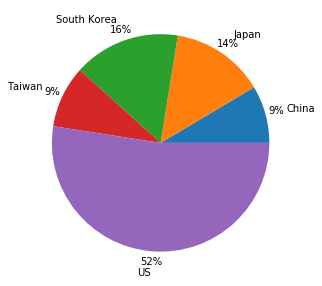

In [83]:
country = df.groupby('Country')['Revenue ($B) USD'].sum()
plt.figure(figsize=(5,5))
plt.pie(country.values, labels=country.index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

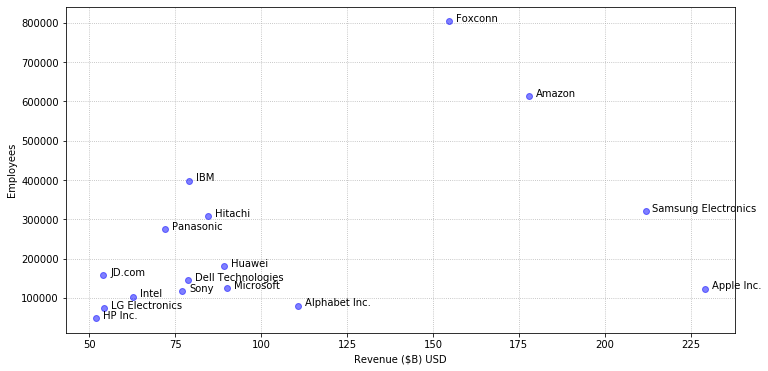

In [108]:
plt.figure(figsize=(12,6))
plt.plot(df['Revenue ($B) USD'], df['Employees'], 'bo', alpha=0.5)
plt.xlabel('Revenue ($B) USD')
plt.ylabel('Employees');
for indx, row in df.iterrows():
    plt.text(row['Revenue ($B) USD']+2, row['Employees'], row['Company'])
plt.grid(linestyle=':')

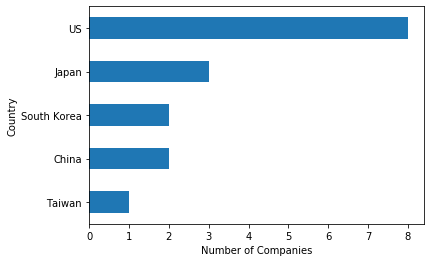

In [112]:
df.groupby('Country').size().sort_values().plot(kind='barh')
plt.xlabel('Number of Companies');